# SVM with Gaussian Kernels

In [2]:
import numpy as np
import pandas as pd
import scipy.io as sio
import scipy.optimize as opt
import seaborn as sns
from matplotlib import pyplot as  plt
from sklearn import svm

In [10]:
def Gaussian(x,y,sigma):
    return np.exp(-(np.sum(pow(x-y,2))/(2*pow(sigma,2))))

In [11]:
##
x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])
sigma = 2
Gaussian(x1,x2,sigma)

0.32465246735834974

## 数据可视化

In [13]:
raw_data = sio.loadmat('/home/leedo/ML_Andrew_Ng/ML-exe/exe6-SVM/data/ex6data2.mat')
raw_data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:28:54 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0.107143 , 0.60307  ],
        [0.093318 , 0.649854 ],
        [0.0979263, 0.705409 ],
        ...,
        [0.975806 , 0.439474 ],
        [0.989631 , 0.425439 ],
        [0.996544 , 0.414912 ]]),
 'y': array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
       

In [15]:
data = pd.DataFrame(raw_data['X'],columns = ['X1','X2'])
data['y'] = raw_data['y']
data.head()

,X1,X2,y
0,0.107143,0.603070,1
1,0.093318,0.649854,1
2,0.097926,0.705409,1
3,0.155530,0.784357,1
4,0.210829,0.866228,1


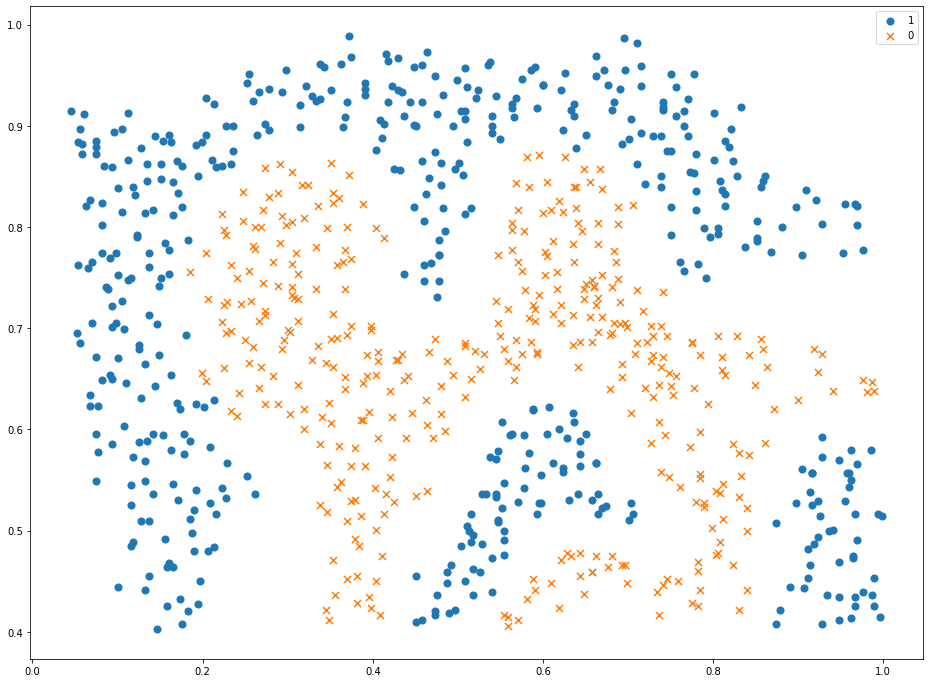

In [32]:
positive = data[data['y'].isin([1])]
negative = data[data['y'].isin([0])]

fig , ax= plt.subplots(figsize=(16,12))

ax.scatter(positive['X1'],positive['X2'],marker = 'o',s=50, label = '1')
ax.scatter(negative['X1'],negative['X2'],marker = 'x',s=50, label = '0')
ax.legend()
plt.show()

In [27]:
svc = svm.SVC(C=100,kernel = 'rbf', gamma=10, probability=True)
svc

SVC(C=100, gamma=10, probability=True)

In [29]:
svc.fit(data[['X1','X2']],data['y'])
svc.score(data[['X1','X2']],data['y'])

0.9698725376593279

In [30]:
data['Probability'] = svc.predict_proba(data[['X1', 'X2']])[:,0]

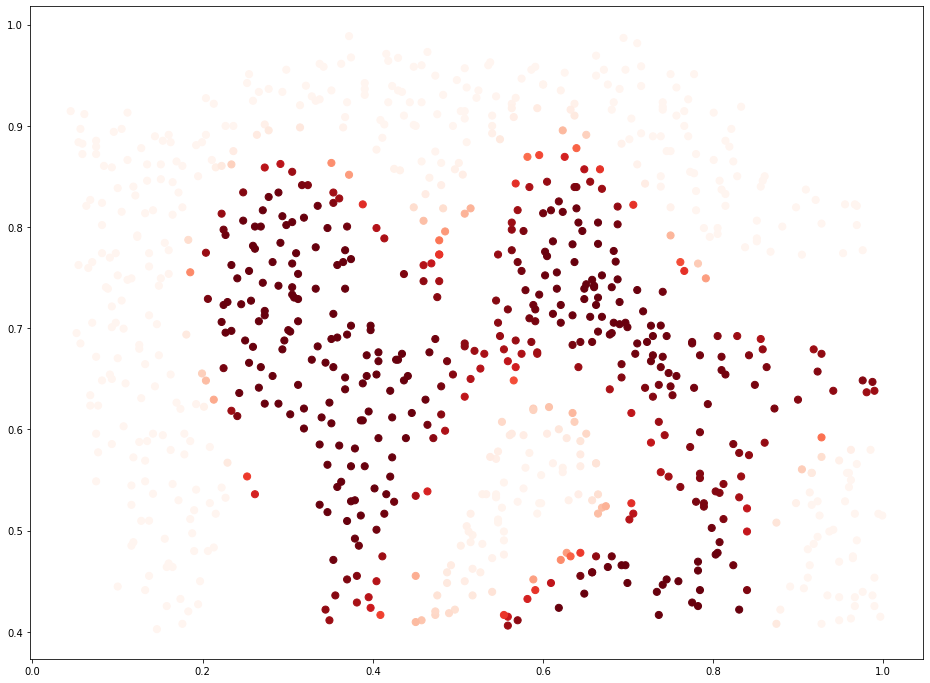

In [33]:
fig, ax = plt.subplots(figsize=(16,12))
ax.scatter(data['X1'], data['X2'], s=50, c=data['Probability'], cmap='Reds')
plt.show()